# Lesson 4. Tabular Data

### Env. Setup

In [1]:
from fastai.tabular import *

### Import Dataset

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/home/jupyter/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/adult_sample/models')]

In [3]:
data = pd.read_csv(path/'adult.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


### Prepare Dataset

In [5]:
#dependent variable 
y = 'salary'
#categorical varaibles
cat_names = ['workclass', 'education','marital-status','occupation','relationship','race','sex', 'native-country']
#continuous variables
cont_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss']
#pre-processsing
procs = [FillMissing, Categorify, Normalize]

In [6]:
#Test data
test = TabularList.from_df(data.iloc[800:1000].copy(), path = path, cat_names=cat_names, cont_names=cont_names)

In [10]:
train = (TabularList.from_df(data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
        .split_by_idx(list(range(800,1000))) #split test data
        .label_from_df(cols=y) #dependent variable 
        .add_test(test)
        .databunch()
        )

In [11]:
train.show_batch(10)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,target
Private,HS-grad,Never-married,Handlers-cleaners,Not-in-family,White,Female,United-States,False,-1.2891,0.0826,-0.4224,-0.1459,-0.2164,<50k
?,11th,Never-married,?,Not-in-family,White,Female,Germany,False,-0.9226,-0.3572,-1.2046,-0.1459,-0.2164,<50k
Private,11th,Married-civ-spouse,Other-service,Wife,White,Female,United-States,False,0.7632,0.0497,-1.2046,-0.1459,-0.2164,<50k
Private,Some-college,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,False,-1.1425,0.1374,-0.0312,-0.1459,-0.2164,<50k
Local-gov,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States,False,-0.3362,0.6198,1.1422,-0.1459,-0.2164,<50k
State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,False,0.1769,-0.4247,1.1422,-0.1459,-0.2164,>=50k
Private,Prof-school,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,False,0.1769,-0.7296,1.9245,-0.1459,-0.2164,>=50k
Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,False,0.0303,-0.5814,-0.4224,-0.1459,4.4703,>=50k
Local-gov,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States,False,-0.1163,-0.8228,1.1422,-0.1459,-0.2164,<50k
State-gov,Masters,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,False,0.9831,1.4136,1.5334,-0.1459,-0.2164,>=50k


### Train Dataset

In [12]:
learn = tabular_learner(train, layers=[200, 100], metrics = accuracy)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


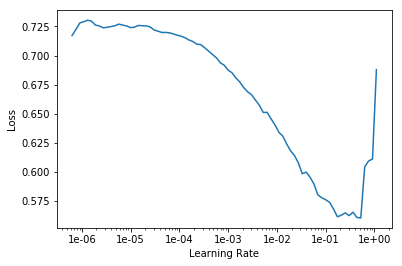

In [14]:
learn.recorder.plot()

In [17]:
learn.fit(3, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.362224,0.392557,0.830000,00:05
1,0.358678,0.374945,0.845000,00:05
2,0.357710,0.354469,0.835000,00:05


In [18]:
learn.save('first_nlp')

### Prediction

In [22]:
first_row = data.iloc[0]

In [23]:
learn.predict(first_row)

(Category >=50k, tensor(1), tensor([0.2764, 0.7236]))

The End